<a name="top"> <h1>3.2. Logistic Regression</h1> <a>

<p>Yelp Dataset- Stars Prediction<br />
<strong>Aprendizaje Autom&aacute;tico</strong><br />
<strong>Master Universitario en Ciencia de Datos</strong></p>

<p>&nbsp;</p>

<p style="text-align:right">Antonio Nogués Podadera (<em>antonio.nogues@cunef.edu</em>)</p>
<p style="text-align:right">V&iacute;ctor Viloria V&aacute;zquez (<em>victor.viloria@cunef.edu</em>)</p>

<hr style="border:1px solid gray">

### Estructura

[0. Introducción](#introduccion) 


[1. Importación de librerias y funciones](#librerias) 


[2. Carga de datos](#datos) 

[3. Creación del modelo](#creacion) 

   
[4. Optimización del modelo](#optimizacion) 

   
[5. Predicción del modelo](#prediccion)

[6. Evaluación de las métricas del modelo](#metricas)

   - Matriz de confusión
   - Métricas: Accuracy, Recall, Precision, F0.5, F1
   - Curva ROC y Lift

<hr style="border:1px solid gray">

# <a name="introduccion"> 0. Introducción <a> 

El **Modelo de Regresión Logística** es un modelo de machine learning utilizado para predecir el resultado de una variable categórica (variable binaria) a partir de un conjunto de variables explicativas. A diferencia de la regresión lineal, que se utiliza para predecir valores continuos, la regresión logística se utiliza para predecir la probabilidad de que un restaurante tenga buena puntuación o no en función de sus atributos.

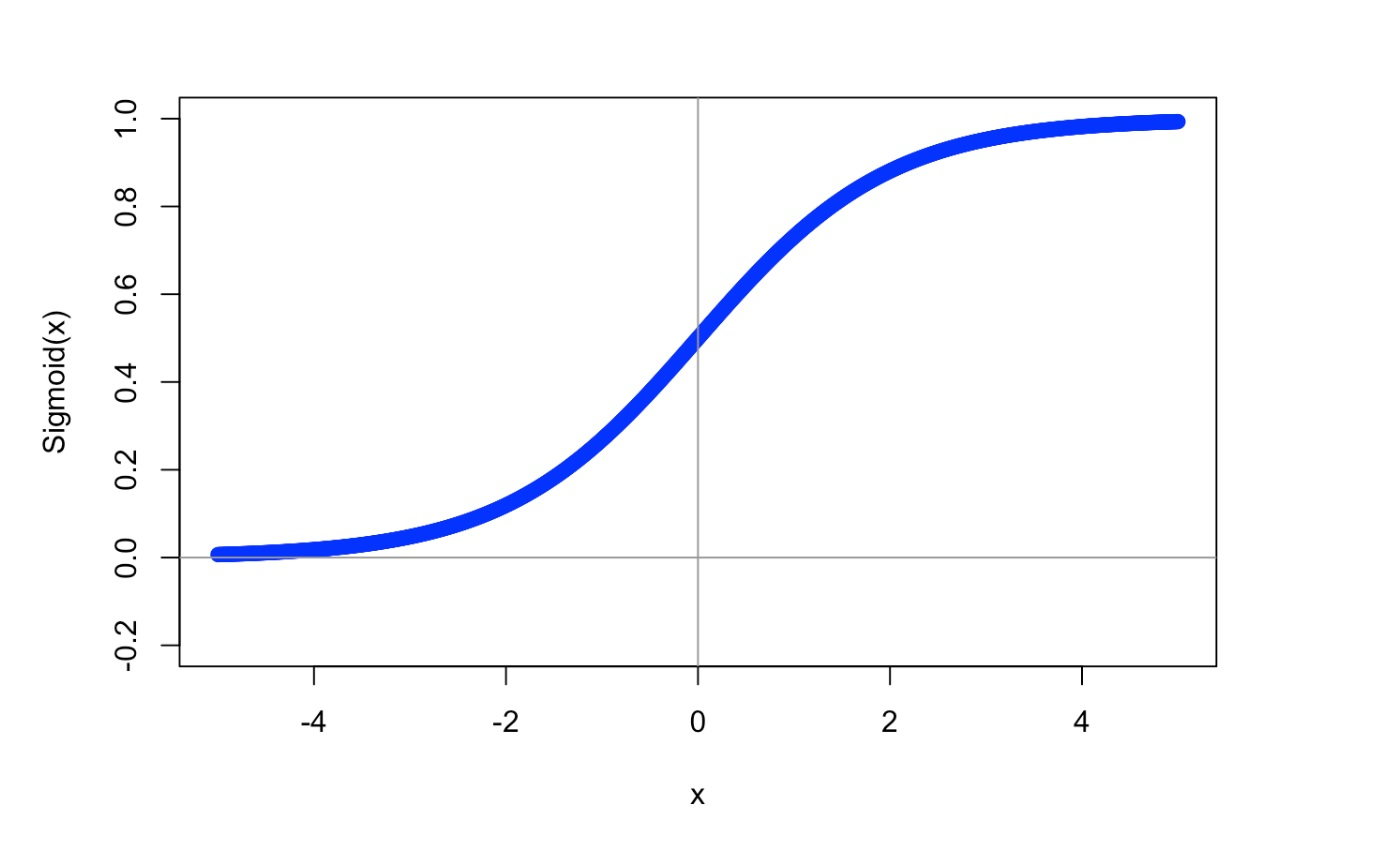

# <a name="librerias"> 1. Importación de librerias y funciones <a> 

In [5]:
# Import basic libraries.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import scikitplot as skplt
import warnings
warnings.filterwarnings('ignore')


# Import sklearn metrics.

from sklearn.metrics import plot_confusion_matrix, fbeta_score, roc_curve, classification_report,accuracy_score,roc_auc_score

# Import sklearn models, smote and pipeline.

from sklearn.linear_model import Lasso, LogisticRegression
from imblearn.pipeline import Pipeline

Importamos las funciones a utilizar:

In [6]:
# Import the functions used in the notebook.

from aux_functions import load_model, save_model

Cargamos el pickle de preprocesado, para su posterior uso:

In [7]:
# Import the preprocessor.

preprocessor = load_model('../models/preprocessor.pickle')

# <a name="datos"> 2. Carga de datos <a> 

En primer lugar procederemos a cargar los datos de train y validación que insertaremos dentro del modelo para su optimización y predicción.

In [8]:
# Load the train dataset separated by other variables and target.

x_train = pd.read_parquet("../data/processed/x_train.parquet").reset_index(drop=True)
y_train = pd.read_parquet("../data/processed/y_train.parquet").reset_index(drop=True)

# Load the validation dataset separated by other variables and target.

x_val = pd.read_parquet("../data/processed/x_val.parquet")
y_val = pd.read_parquet("../data/processed/y_val.parquet")

# <a name="creacion"> 3. Creación del modelo <a> 

Para la creación del modelo, **utilizaremos un modelo de regresión logística** con una función de penalización de tipo Lasso (L1) con el objetivo de evitar un sobreajuste del modelo, además utilizaremos la función liblinear dado que nuestra variable objetivo no tiene más de dos clases.

In [5]:
# Designate the hyperparameters.

n_jobs = -1 
random_state = 12345
solver= 'liblinear'
penalty = 'l1'


# Create a pipeline that applies a data preprocess and then the Logistic Regression.

logistic_regression = Pipeline([
    ('preprocessor', preprocessor),
    ('clasificador', LogisticRegression(random_state=random_state, n_jobs=n_jobs, penalty=penalty, solver=solver))
    
])

# <a name="optimizacion"> 4. Optimización del modelo <a> 

Optimizamos el modelo a través del pipeline creado anteriormente, para ello introduciremos los valores de train.

In [6]:
# Optimization of the Regression model with the train set: input and target data. 

logistic_regression.fit(x_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('short_cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value=0,
                                                                                 strategy='constant')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['attributes_ByAppointmentOnly',
                                                   'attributes_BusinessAcceptsCreditCards',
                                                   'attributes_BikeParking',
                                                   'attributes_RestaurantsPriceRange2',
                                                   'attributes_...
                                                   'attributes_AgesAllowed']),
                                                 ('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['review_count',
                                                   'total_hours_Monday',
                                                   'total_hours_Tuesday',
                                                   'total_hours_Wednesday',
                                                   'total_hours_Thursday',
                                                   'total_hours_Friday',
                                                   'total_hours_Saturday',
                                                   'total_hours_Sunday',
                                                   'total_checkins'])])),
                ('clasificador',
                 LogisticRegression(n_jobs=-1, penalty='l1', random_state=12345,
                                    solver='liblinear'))])

Una vez optimizado el modelo Logistic Regression, con el set de train, procedemos a guardarlo en un pickle para que no tenga que volver a computarlo en un futuro, por si quisieramos usarlo.

In [7]:
# Save the backup of the logistic_regression optimization as a pickle file.

save_model(logistic_regression,'../models/Logistic_Regression_Lasso.pickle')

**Para evitar optimizar de nuevo el modelo, ejecutar a partir de la celda que aparece a continuación.**

In [9]:
# Load the GLM model already fitted in /models.

logistic_regression = load_model('../models/Logistic_Regression_Lasso.pickle')

# <a name="prediccion"> 5. Predicción del modelo <a>  

Una vez realizada la optimización del modelo Logistic Regression, procederemos a predecir el set de validación, sus valores y probabilidades. Para posteriormente obtener las métricas y observar como se comporta el modelo y su score.

In [10]:
# Predict the target value of the validation set.

predictions = logistic_regression.predict(x_val)

# Predict the probabilities of the target value for validation set.

predict_probabilities = logistic_regression.predict_proba(x_val)

Una vez obtenidas las probabilidades, representamos el histograma de densidad de la predicción:

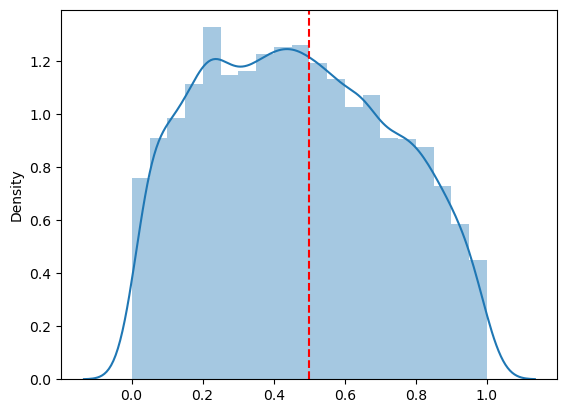

In [11]:
# Parametric density histogram of the predicted probabilities, shwoing the treshold of 0.5.

sns.distplot(predict_probabilities[:,1], kde=True, rug=False, bins=20)
plt.axvline(x=0.5, color='r', linestyle='--')
plt.show()



En el histograma de densidad de las probabilidades observamos  como el modelo asigna un mayor número de observaciones probabilidades bajas,dado que no superan el umbral de 0.5 definido.

# <a name="metricas"> 6. Evaluación de las métricas del modelo <a> 

En este apartado procederemos a análizar las métricas obtenidas. Nos centraremos principalmente en la métrica F0.5 , dado que es la que mejor refleja los resultados del modelo para nuestro problema. En el caso de que se quiera consultar la definición de cada una de ellas, se pueden encontrar en el documento `02_DummyModel`. 

### 6.1. Matriz de confusión

Confusion matrix, without normalization
[[2630  795]
 [ 972 2075]]
Normalized confusion matrix
[[0.76788321 0.23211679]
 [0.3190023  0.6809977 ]]


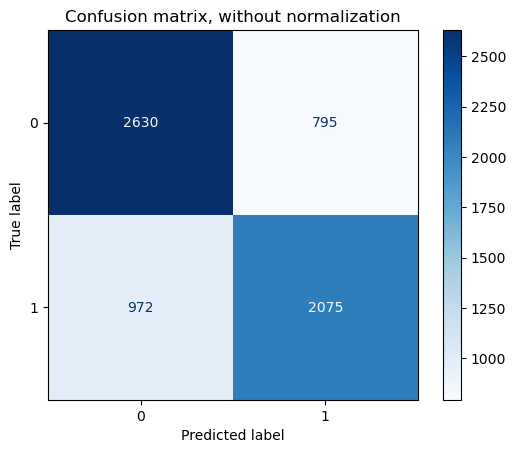

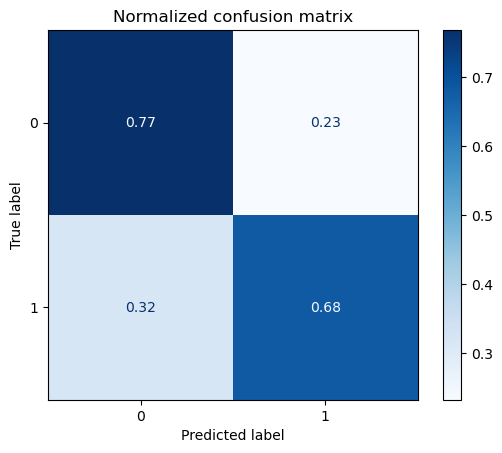

In [12]:
# Plot non-normalized confusion matrix
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(logistic_regression, x_val, y_val,
                                 # display_labels=ytest,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

La matriz de confusión nos permite observar que la clase 1 la identifica de manera aceptable, puesto que tiene un **68%** de acierto. Los resultados no son malos aunque podrían ser mejores, pero es un buen comienzo.

### 6.2. Métricas: Accuracy, Recall, Precision, F1 y  F0.5 score

In [12]:
# Print the general metrics.

print(classification_report(y_val, predictions))

              precision    recall  f1-score   support

           0       0.73      0.77      0.75      3425
           1       0.72      0.68      0.70      3047

    accuracy                           0.73      6472
   macro avg       0.73      0.72      0.72      6472
weighted avg       0.73      0.73      0.73      6472



In [13]:
# Model Accuracy

print("Accuracy:",accuracy_score(y_val, predictions))

# F 0.5 score.

print('F0.5 score is ' +str(fbeta_score(y_val, predictions, average='binary', beta=0.5)))

Accuracy: 0.7269777503090235
F0.5 score is 0.714187375232326


Para poder reflejar la capacidad predictora del modelo utilizaremos el Accuracy, el Recall y F0.5 score.

- El modelo nos calcula un **Recall de 0.72**,  por lo que el modelo es capaz de identificar un 72% de casos en los que hay una valoración alta.


- El modelo nos calcula un **Accuracy de 0.72**, por lo que el modelo es capaz de acertar en el 72% de los casos. 


- **El modelo nos calcula un F0.5 de 0.71, por lo que el modelo es capaz de diferenciar falsos positivos en el 71% de los casos. Esta medida es la que utilizaremos para compararlo con el resto de modelos**

Las métricas presentan valores buenos para el Logistic Regression con penalización Lasso, pero podrían ser mejores.

### 6.3. Curva ROC y Lift

Para evaluar nuestro modelo, las representaremos graficamente para deducir que tan bueno es el modelo.

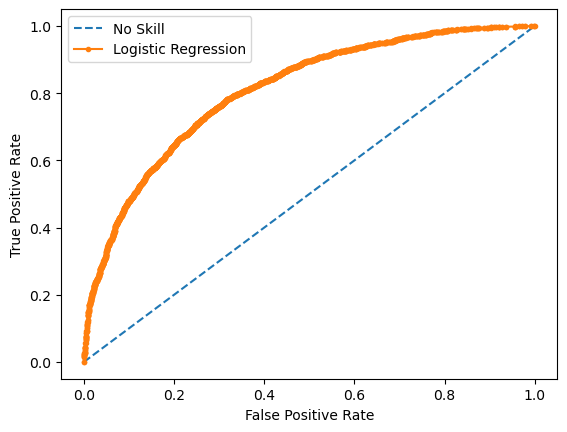

The Compute Area Under the Receiver Operating Characteristic is 0.8074299718042637


In [14]:
# keep probabilities for the positive outcome only
yhat = predict_probabilities[:, 1]
# calculate roc curves
fpr, tpr, thresholds = roc_curve(y_val, yhat)
# plot the roc curve for the model
plt.plot([0,1], [0,1], linestyle='--', label='No Skill')
plt.plot(fpr, tpr, marker='.', label='Logistic Regression')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
# show the plot
plt.show()

# Display the ROC AUC.

print('The Compute Area Under the Receiver Operating Characteristic is '+ str(roc_auc_score(y_val,yhat)))

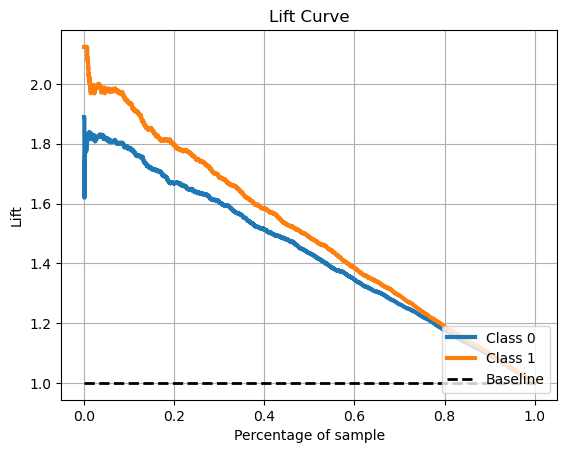

In [28]:
# Plot the lift curve.

skplt.metrics.plot_lift_curve(y_val, predict_probabilities)
plt.show()


 La curva ROC muestra un resultado bueno, pues el área bajo la curva es de 0.80.

 En cuanto a la curva lift, podemos observar que el modelo es bueno, puesto que la elevación se mantiene en un nivel alto durante todo el proceso.

[Ir arriba del documento](#top)